# Ford GoBike

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. The system is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Ford GoBike is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. As of January 2018, the system had seen nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers. The bicycles are available 24 hours a day, seven days a week for periods ranging from a single ride (up to 30 minutes) to a day pass, in 30-minute increments, or customers can purchase an annual subscription which gives them unlimited rides up to 45-minutes in duration

## Import Modules & Libraries 

In [227]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import calendar
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import matplotlib.ticker as tick
from math import radians, sin, cos, acos
import math

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap, figure

%matplotlib inline


## load the dataset

In [228]:
df = pd.read_csv('data.csv')
display(df.head())

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [230]:
#check duplicate value
df.duplicated().sum()

0

In [231]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


## Generate new fields for date from start_time and end_time

In [232]:
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date

df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))
                                                                  

df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)
                                                                  
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)

df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))
                                                                  
df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour

df['start_time_weekday']=df['start_time'].dt.weekday_name
df['end_time_weekday']=df['end_time'].dt.weekday_name
                            


In [233]:
df['start_time_year_month_new'] = df['start_time'].dt.strftime('%y' + '-' + '%m')

In [234]:
df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr']=df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

### Generate minutes for trip duration from duration_sec

In [235]:
                                                                  
df['duration_min'] = df['duration_sec']/60
df['duration_min'].sample(5)

310449     4.466667
31295     16.900000
153091    16.150000
85942      4.416667
138530    28.050000
Name: duration_min, dtype: float64

In [236]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time_hour_minute,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday,start_time_year_month_new,start_time_weekday_abbr,end_time_weekday_abbr,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,16-12,15-01,16,15,Sunday,Monday,17-12,Sun,Mon,1335.166667
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,15-12,13-01,15,13,Sunday,Monday,17-12,Sun,Mon,1313.333333
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,22-12,11-01,22,11,Sunday,Monday,17-12,Sun,Mon,762.800000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,17-12,10-01,17,10,Sunday,Monday,17-12,Sun,Mon,1036.200000
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,14-12,02-01,14,2,Sunday,Monday,17-12,Sun,Mon,726.716667


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 33 columns):
duration_sec                 519700 non-null int64
start_time                   519700 non-null datetime64[ns]
end_time                     519700 non-null datetime64[ns]
start_station_id             519700 non-null int64
start_station_name           519700 non-null object
start_station_latitude       519700 non-null float64
start_station_longitude      519700 non-null float64
end_station_id               519700 non-null int64
end_station_name             519700 non-null object
end_station_latitude         519700 non-null float64
end_station_longitude        519700 non-null float64
bike_id                      519700 non-null int64
user_type                    519700 non-null object
member_birth_year            453159 non-null float64
member_gender                453238 non-null object
start_time_date              519700 non-null object
end_time_date                519700 non-

In [223]:
df.drop(['member_birth_year'], axis=1, inplace=True)

In [239]:
df['member_age'] = 2019-df['member_birth_year']

In [240]:
df.member_age.count()

453159

### Generate a new field for member age group from member_age_bins

In [241]:
df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

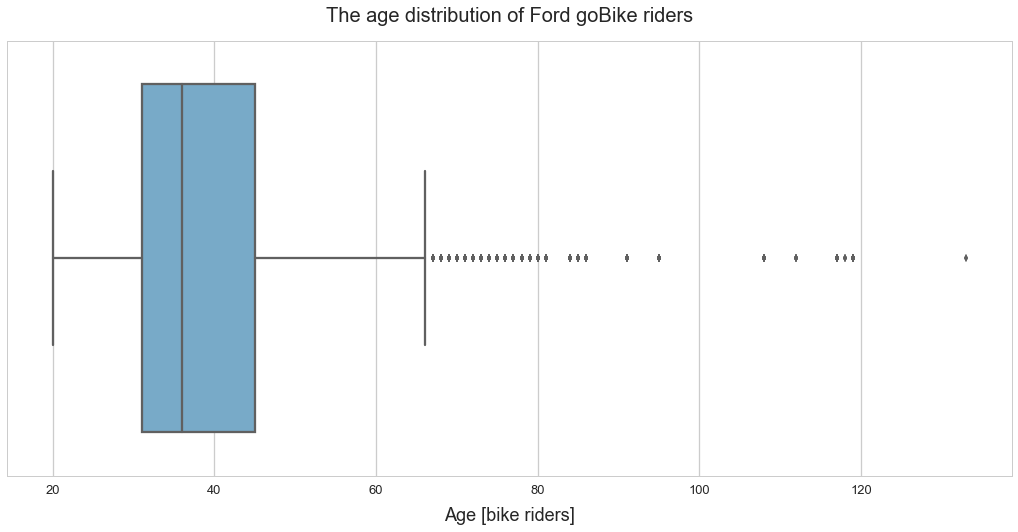

In [242]:
plt.figure(figsize=(18,8))
sns.boxplot(x='member_age', data=df, palette='Blues', orient='h')
plt.title("The age distribution of Ford goBike riders", fontsize=20, y=1.03)
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10)
plt.savefig('Im.png');


#### There are outliers. Age from 20 to 65 takes 95% of the users. So, it's logical to remove users more than 60 years old. There were users more than 100 years old.

In [243]:
df=df[df['member_age'] <=60]

In [244]:
np.mean(df.member_age)

37.5353645191863

### Count of daily bike rides from June 2017 to July 2018

In [245]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

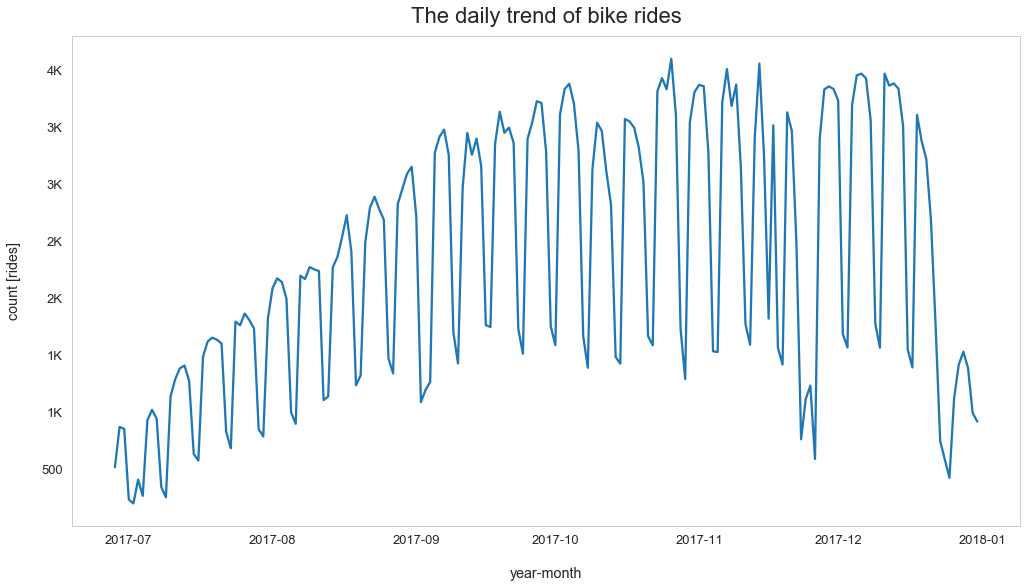

In [247]:

df.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(17,9))
plt.title('The daily trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=20)
plt.ylabel('count [rides]', labelpad=20)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('Im1.png');


 As we can see, the daily trends of cyclists dips down in December and January. This is because it is very cold

# Different gender comparison 

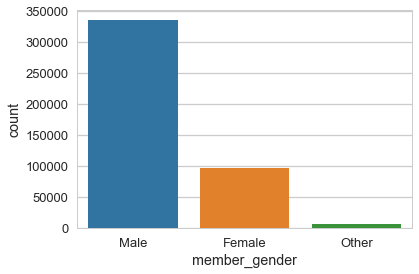

In [248]:
sns.countplot(data = df, x = 'member_gender')
plt.savefig('Im2.png')

male counts over 300k which is three time more than female counts which is approx 100k, rest others

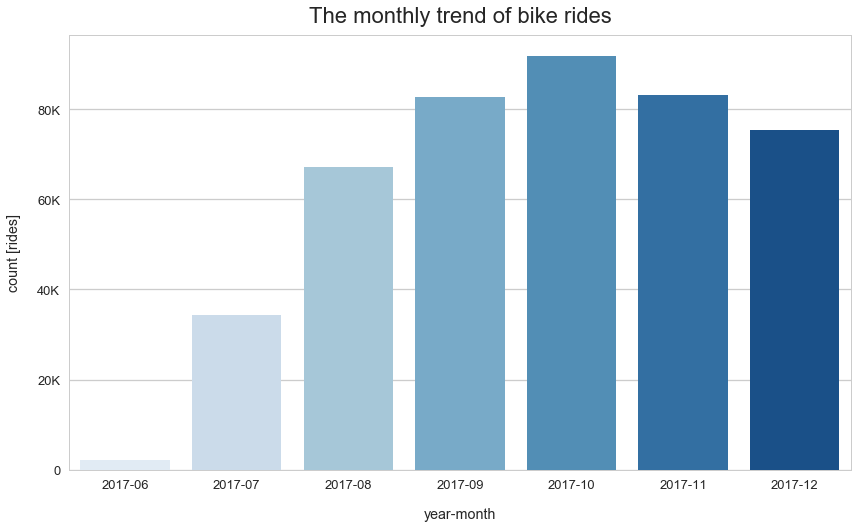

In [249]:
plt.figure(figsize=(14,8))
sns.countplot(x='start_time_year_month', palette="Blues", data=df.sort_values(by='start_time_year_month'))
plt.title('The monthly trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('Im3.png');

After july and august count rides inc more in autumn season as we can from december count rides start dec

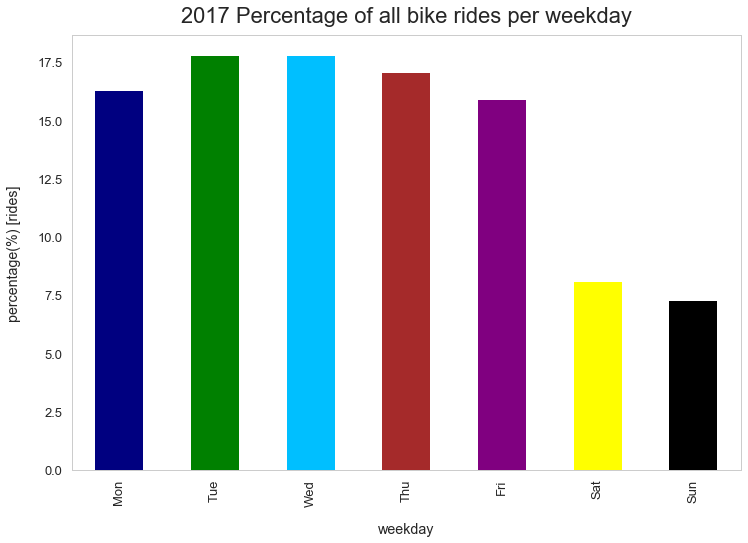

In [250]:
trip_by_weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
new_color = ['navy', 'green', 'deepskyblue', 'brown', 'purple', 'yellow', 'black']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('2017 Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.savefig('Im4.png')
plt.grid()

Tue & Wed having higest 17.5% bike rides as we heading towards weekend thru & fri decline the rides %, sat then sun having half the rides percentage counts compare to weekdays

## Count of People Who took bike rides by Age Group Per Month

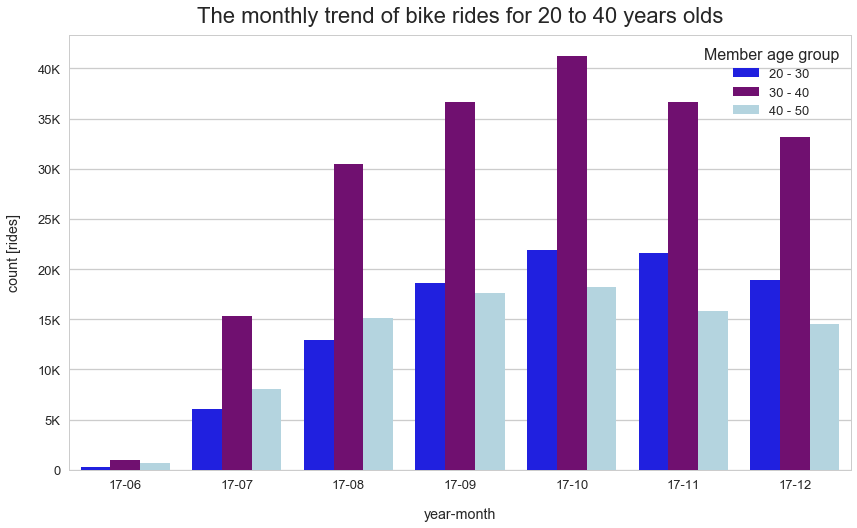

In [251]:
plt.figure(figsize=(14,8))
my_palette = {'20 - 30': 'blue', '30 - 40': 'purple', '40 - 50': 'lightblue'}
ax = sns.countplot(x='start_time_year_month_new', hue='member_age_bins', palette=my_palette, data=df[df['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_year_month_new', 'member_age_bins']))
plt.title('The monthly trend of bike rides for 20 to 40 years olds', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('Im5.png');

age group 30-40 dominant during autumn season they cross the 40k rides which really good, age group 20-30 is doing half the rides compare to purple age group but if we compare blue and skyblue age group skyblue having more ride in 1st 3 months later on blue age group surpass them for rest of the months but puple age group way a head from others.

# In a day per hours Bike rides 

In [117]:
trip_by_hour = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

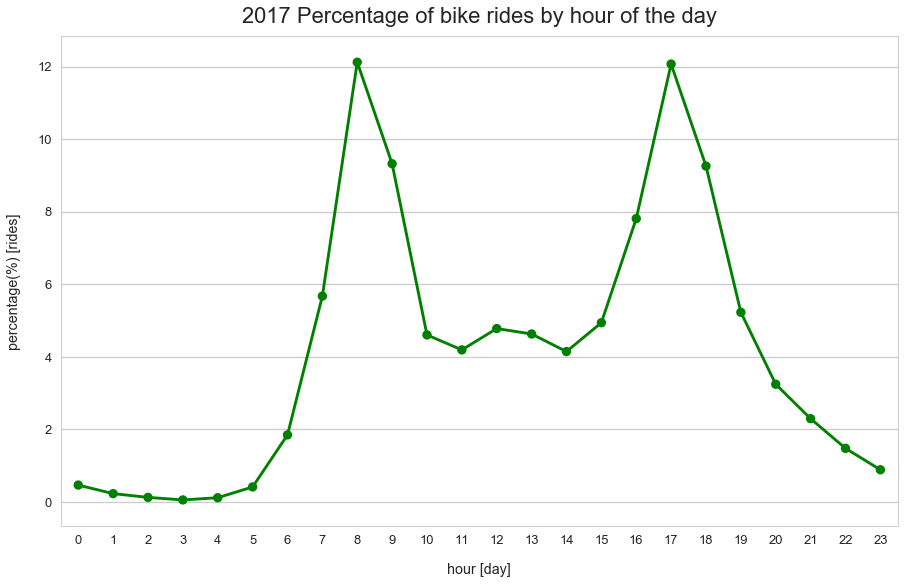

In [252]:
trip_by_hour['bike_id'] = (trip_by_hour['bike_id']/trip_by_hour['bike_id'].sum())*100

plt.figure(figsize=(15,9))
sns.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='green', data=trip_by_hour)
plt.title('2017 Percentage of bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.savefig('Im6.png')

8am morning and 17pm evening are the peak hours for this service. majority of people use this service during commute time. Also, people use it when in lunch time as well.

# Differentiate Between subscribers and customers ?

Count of bike rides of subscribers and customers?

In [148]:
count_of_rides_per_user_type = df.groupby('user_type').size().reset_index(name='count')
count_of_rides_per_user_type['count']/len(df)*100

0    10.969457
1    89.030543
Name: count, dtype: float64

Trend of bike rides per user type

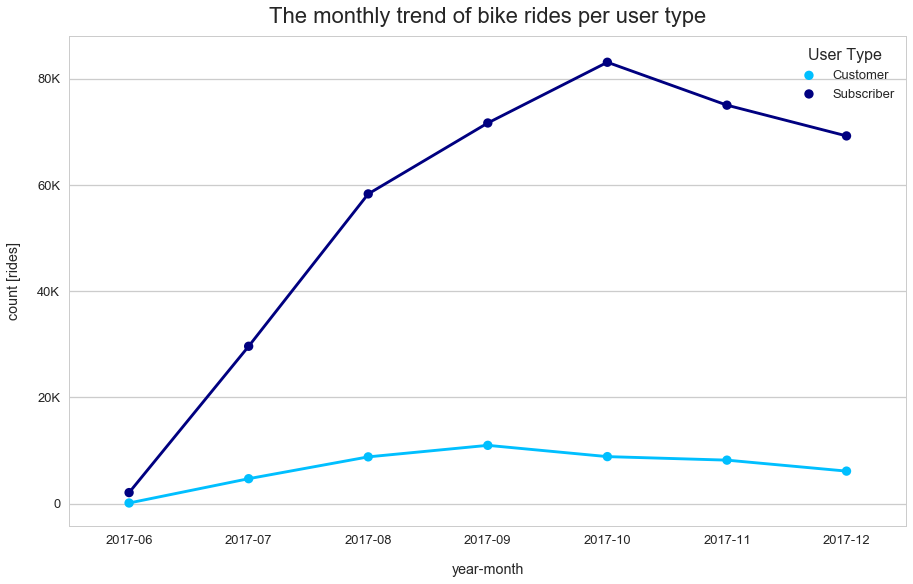

In [149]:
user_type_count_per_year_df = df.groupby(["start_time_year_month", "user_type"]).size().reset_index()
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sns.pointplot(x='start_time_year_month', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_count_per_year_df)
plt.title('The monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('Im7.png');

There is huge gap between customer & Subscriber Although normal customers' rides seems increasing, dominant rides were from subscribers. Subscibers rides reached 5.5 times more than customers' on oct 2017

###### Average trip duration per user type 

    user_type    Minutes
0    Customer  31.357071
1  Subscriber  11.704995


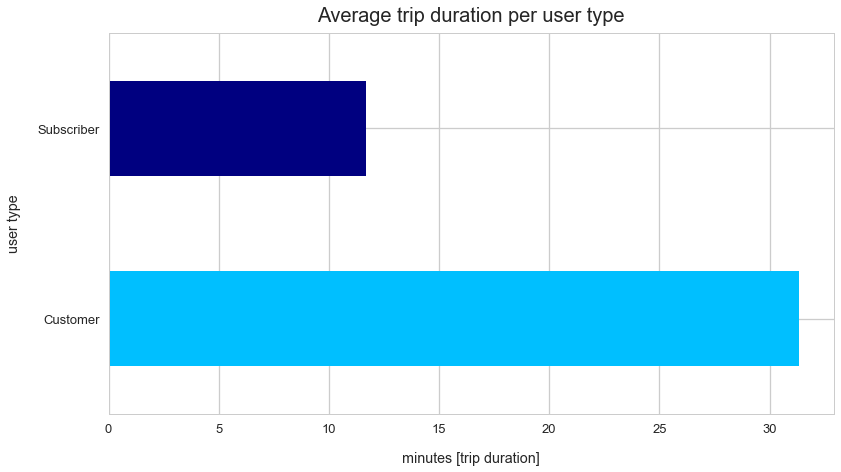

In [150]:
new_color=['deepskyblue', 'navy']
ax = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)
datalabel = df.groupby('user_type')['duration_min'].mean().reset_index(name='Minutes')
print(datalabel)
plt.savefig('Im9.png');

Subscribers' average trip duration is 11 minutes. On the contrary, customers' average trip duration is 31 minutes. So, 80% of the rides are from subscribers and it can be implied that they use this service to commute

### The trend of subscribers' bike rides per age group

In [151]:
subscriber_age_df = df[df['user_type']=='Subscriber'].groupby(['start_time_year_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

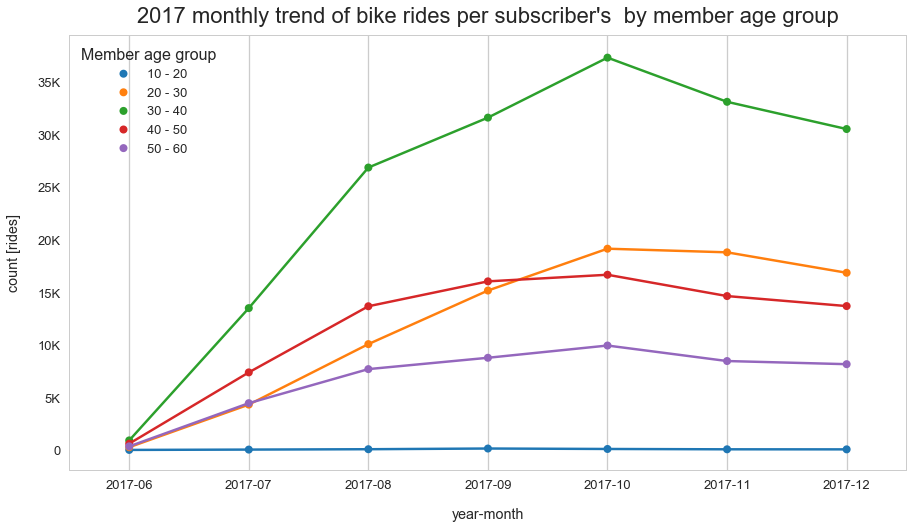

In [156]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x='start_time_year_month', y='bike_id', hue='member_age_bins', 
                  scale=.6, data=subscriber_age_df)
plt.title("2017 monthly trend of bike rides per subscriber's  by member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('Im10.jpg')

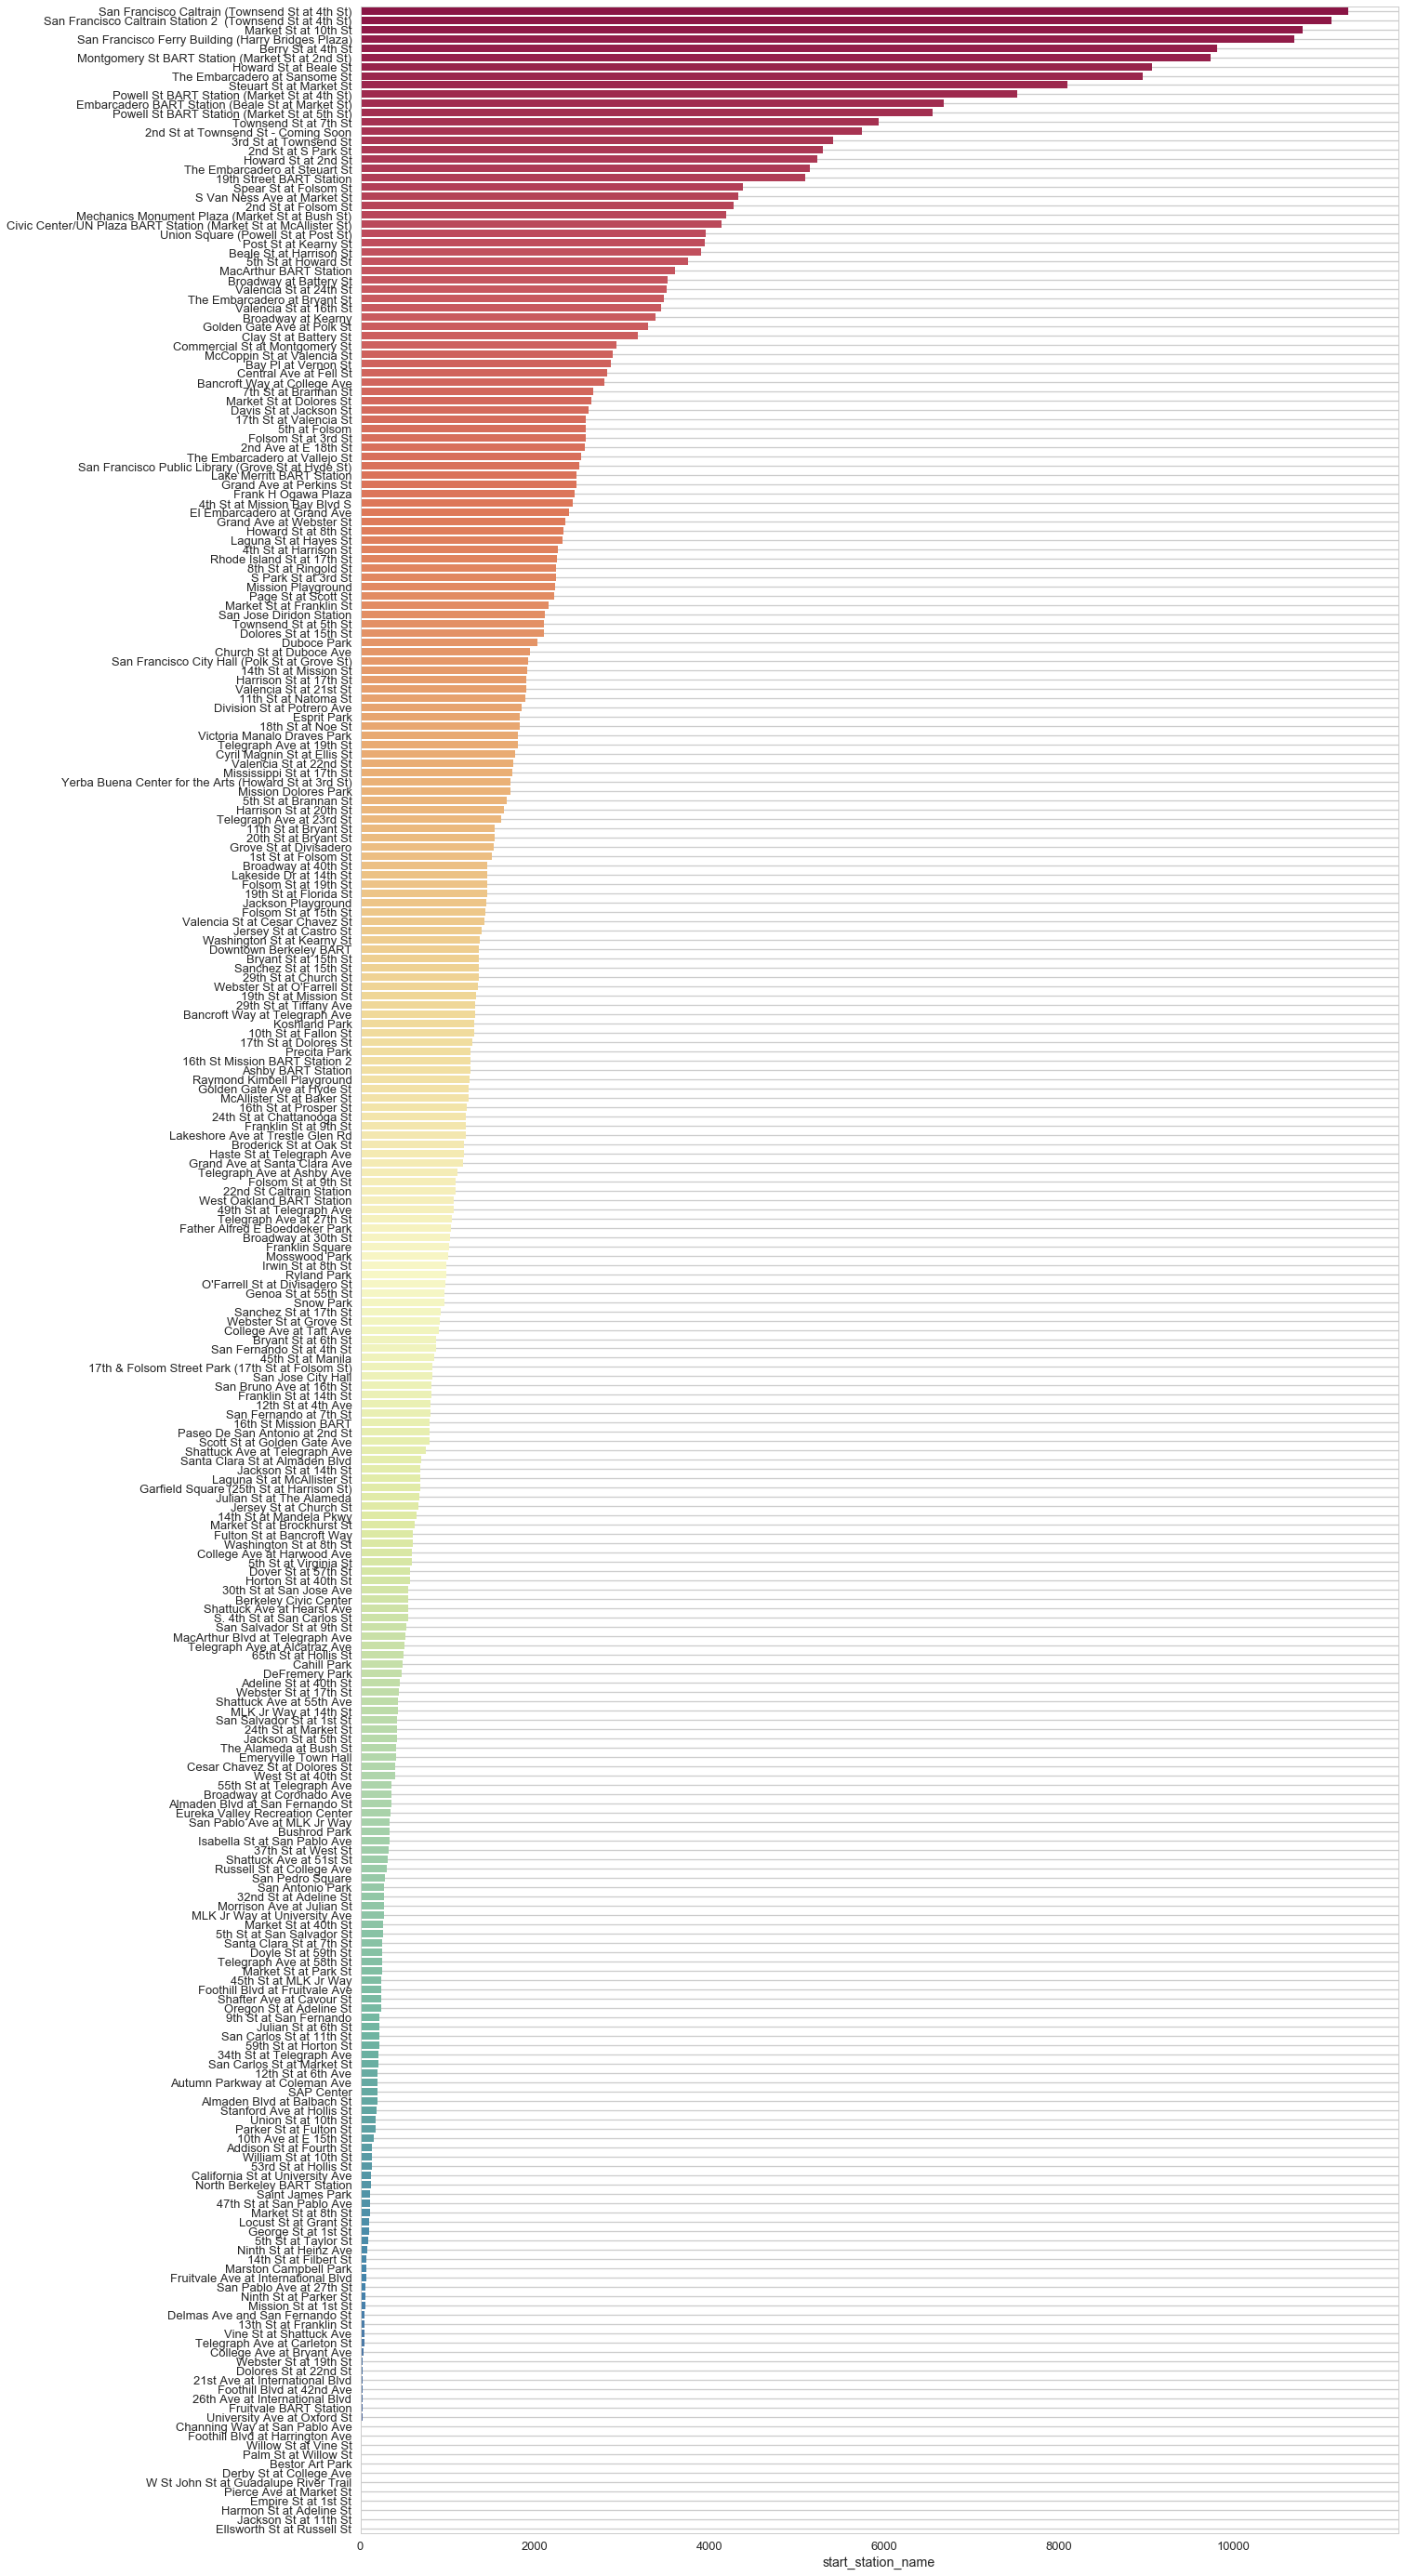

In [201]:
plt.figure(figsize=(20,50))
data=df.start_station_name.value_counts()
sns.barplot(y=data.index, x = data, orient='h',palette='Spectral')
plt.grid()
plt.savefig('Im13.jpg')

In [184]:
subscriber_hour_df = df[(df['member_age']>=20) & (df['member_age']<40) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [185]:
subscriber_hour_df['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [187]:
subscriber_hour_df['count_perc'] = subscriber_hour_df['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)

In [188]:
subscriber_hour_df['rank'] = subscriber_hour_df['count_perc'].rank(ascending=False).astype(int)


In [189]:
subscriber_hour_df_pivoted = subscriber_hour_df.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

In [190]:

customer_hour_df = df[(df['member_age']>=20) & (df['member_age']<40) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Customer') 
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [191]:
customer_hour_df['start_time_weekday_abbr'] = pd.Categorical(customer_hour_df['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [192]:
customer_hour_df['count_perc'] = customer_hour_df['count'].apply(lambda x: (x/customer_hour_df['count'].sum())*100) #male

In [193]:
customer_hour_df['rank'] = customer_hour_df['count_perc'].rank(ascending=False).astype(int)

In [194]:
customer_hour_df_pivoted = customer_hour_df.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank').astype(int)

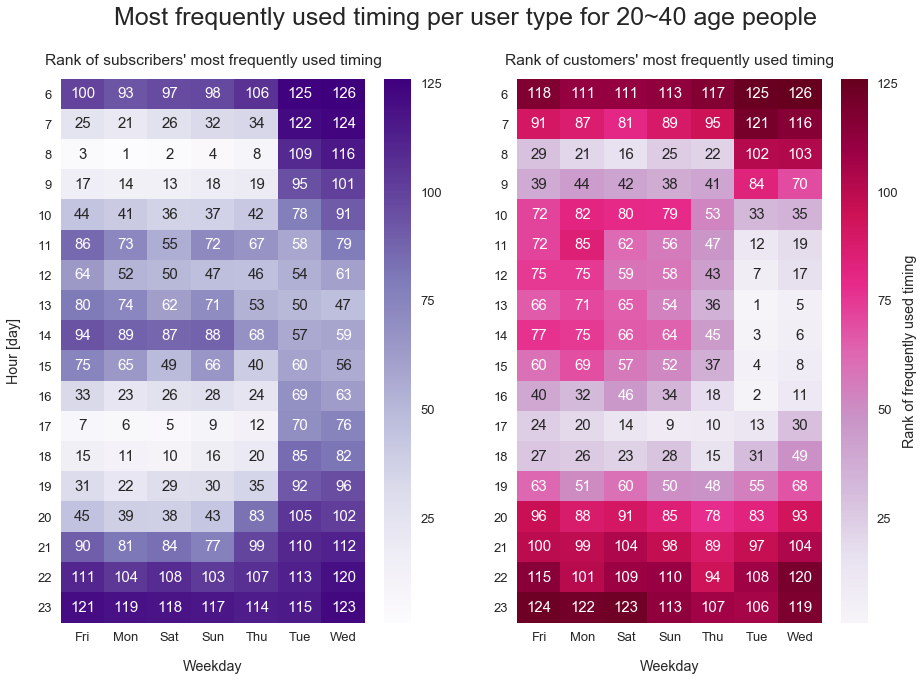

In [199]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.suptitle('Most frequently used timing per user type for 20~40 age people', fontsize=25)
sns.heatmap(subscriber_hour_df_pivoted, fmt='d', annot=True, cmap='Purples', annot_kws={"size": 15})
plt.title("Rank of subscribers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour [day]', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(122)
sns.heatmap(customer_hour_df_pivoted, fmt='d', annot=True, cmap='PuRd', annot_kws={"size": 15}, cbar_kws={'label': 'Rank of frequently used timing'})
plt.title("Rank of customers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.savefig('im14.png');

Subscribers' most frequently used timing is around 7~9am and 4~6pm, which is a commute time. on other hand , Customers' most frequently used timing are weekend 12pm~4pm and weekday 5pm~6pm. Customers tend to use this service during weekend for leisure and after work.